In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('Country-data (1).csv')
df=data.copy()

In [3]:
df.head(100).tail(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
90,Lithuania,6.1,65.3,7.04,67.2,21100,2.38,73.2,1.50,12000
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.62,81.3,1.63,105000
92,"Macedonia, FYR",10.4,39.8,7.09,58.1,11400,2.04,74.0,1.47,4540
93,Madagascar,62.2,25.0,3.77,43.0,1390,8.79,60.8,4.60,413
94,Malawi,90.5,22.8,6.59,34.9,1030,12.10,53.1,5.31,459
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9070
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Text(0.5, 1.0, 'Correlation Heatmap')

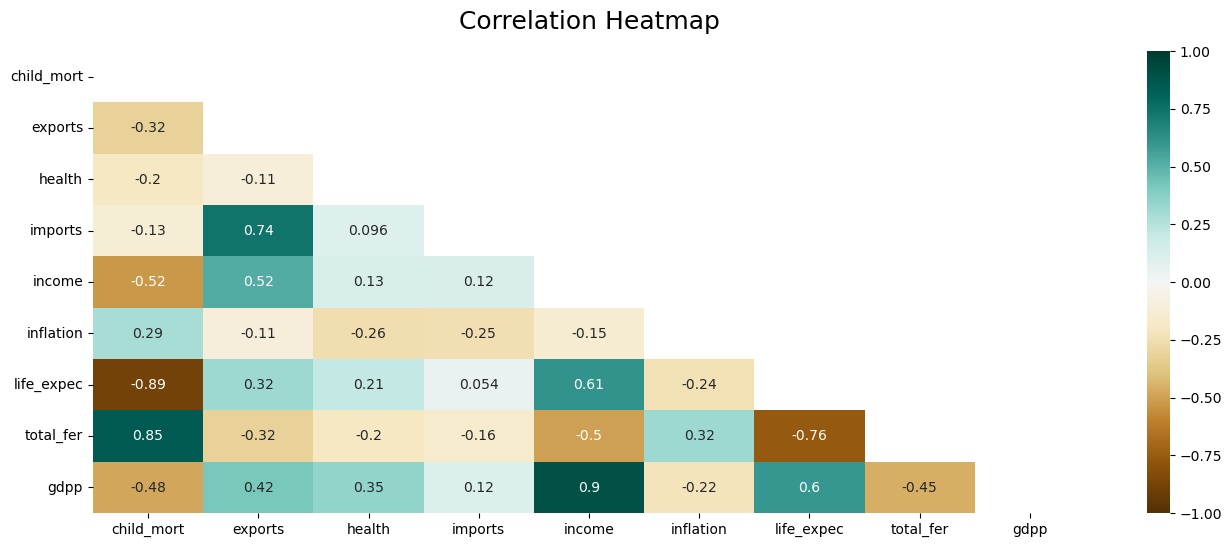

In [5]:
plt.figure(figsize=(16,6))
mask=np.triu(np.ones_like(df.corr(),dtype=np.bool_))
heatmap=sns.heatmap(df.corr(),mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

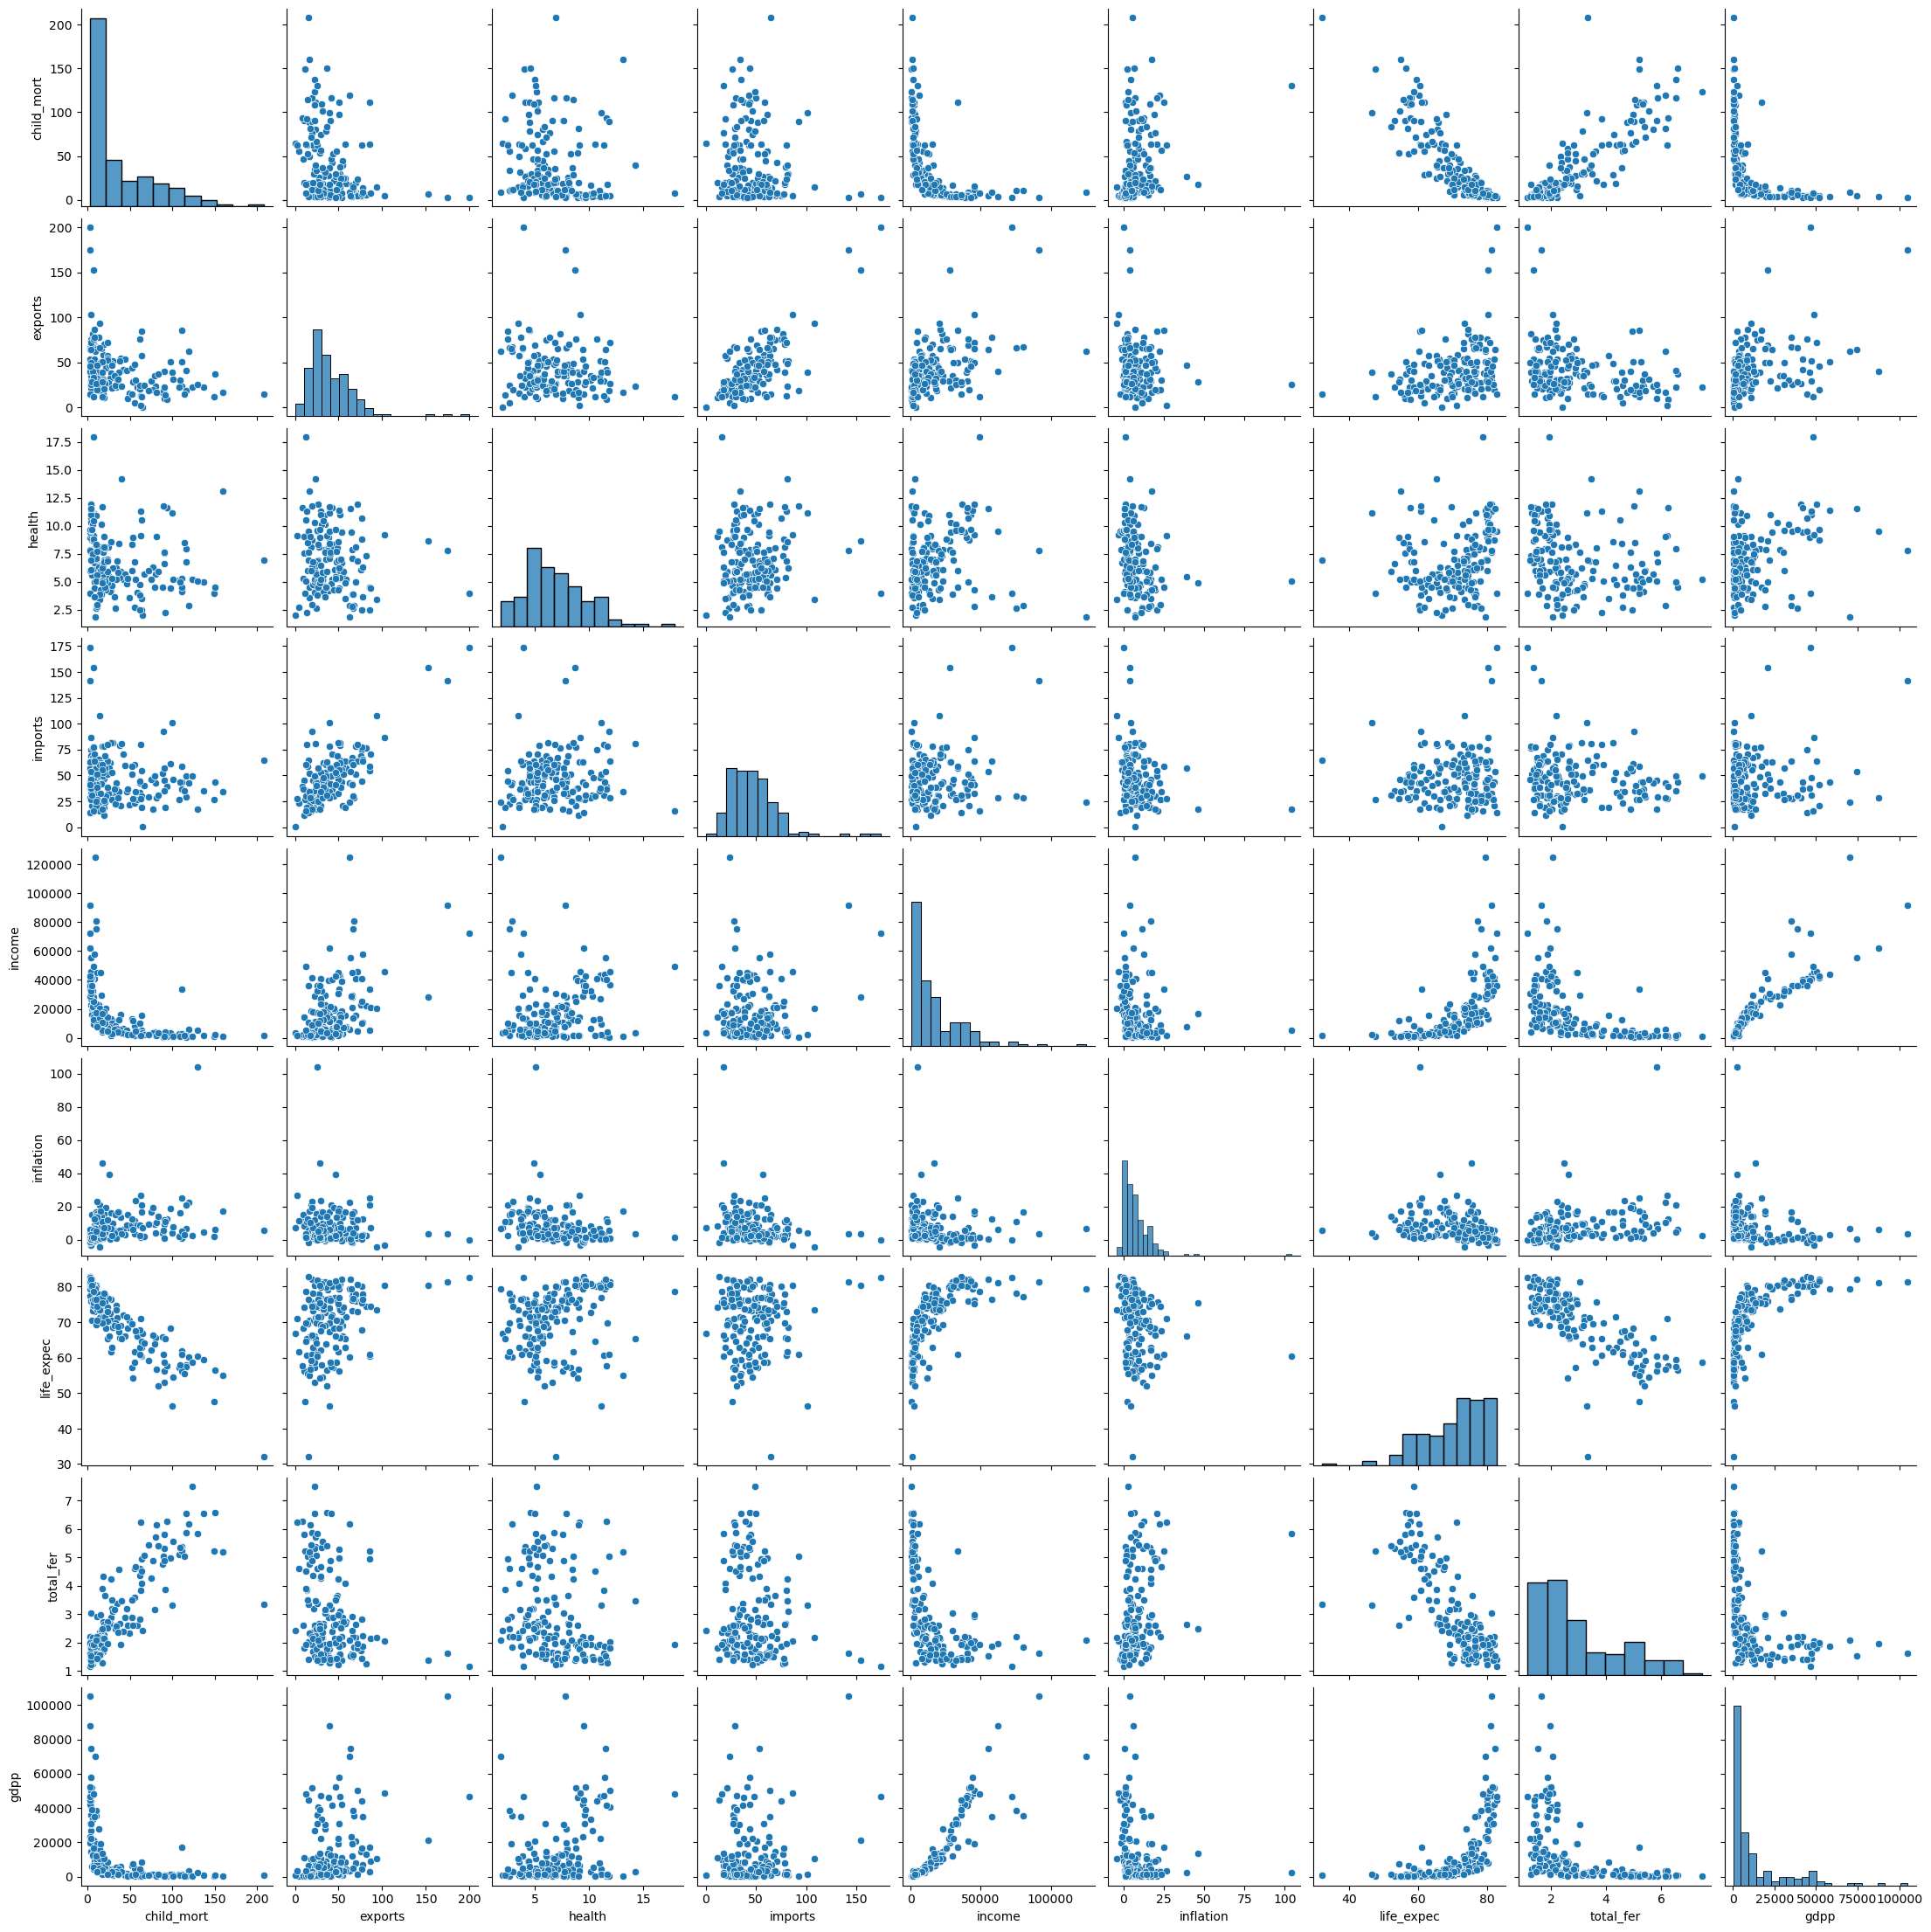

In [6]:
sns.pairplot(df)

In [7]:
df.set_index('country', inplace=True)

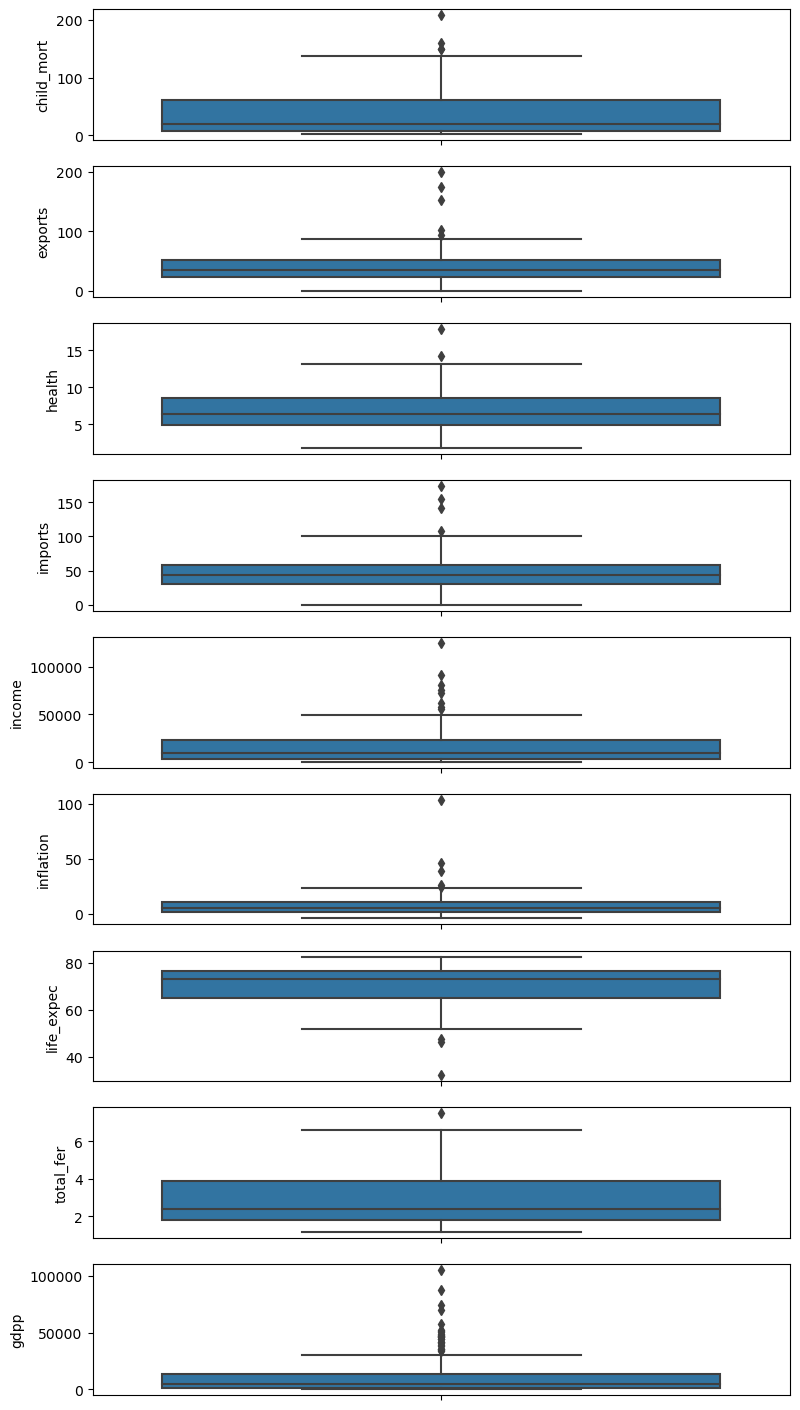

In [8]:
#Here I want to see outliers
df_cols=df.columns
fig, axes = plt.subplots(nrows=len(df_cols),figsize=(9,18))
for i in range(len(df_cols)):
    sns.boxplot(ax=axes[i],y=df_cols[i],data=df)

In [9]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3=np.percentile(datacolumn, [25,75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range 

In [10]:
for col in df.columns:
    lowerbound,upperbound=outlier_treatment(df[col])
    df[col] = np.clip(df[col],a_min=lowerbound,a_max=upperbound)

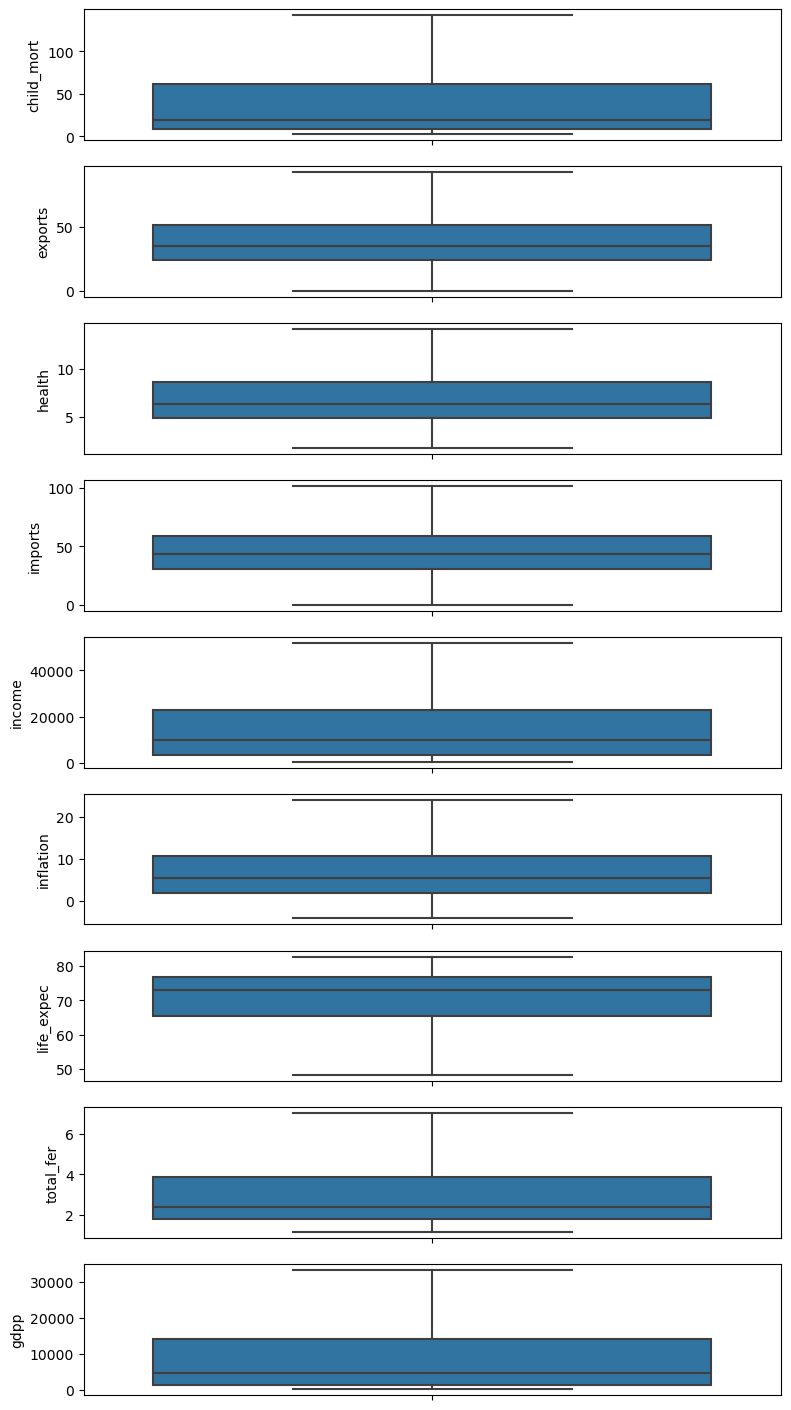

In [11]:
#Here I want to see outliers
df_cols=df.columns
fig, axes = plt.subplots(nrows=len(df_cols),figsize=(9,18))
for i in range(len(df_cols)):
    sns.boxplot(ax=axes[i],y=df_cols[i],data=df)

In [12]:
from sklearn.preprocessing import StandardScaler
#scaling the data
column_names = df.columns
scaler=StandardScaler()
df=scaler.fit_transform(df)
df = pd.DataFrame(df, index=data.country, columns=column_names)

In [13]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.369802,-1.391107,0.296013,-0.047444,-0.943936,0.355270,-1.702225,1.915276,-0.846341
Albania,-0.550464,-0.543547,-0.091190,0.135021,-0.395181,-0.385208,0.663321,-0.862779,-0.540827
Algeria,-0.271295,-0.053846,-0.985893,-0.713196,-0.199291,1.351551,0.686859,-0.036691,-0.508868
Angola,2.121210,1.071524,-1.482114,-0.146074,-0.660984,2.293979,-1.243238,2.141784,-0.589198
Antigua and Barbuda,-0.714835,0.280469,-0.286671,0.642965,0.209637,-0.841463,0.722166,-0.543003,0.159686
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.221723,0.332264,-0.579893,0.337212,-0.855555,-0.664945,-0.901941,0.369691,-0.637569
Venezuela,-0.537419,-0.520004,-0.707708,-1.393742,0.038151,2.557260,0.557401,-0.316495,0.271975
Vietnam,-0.375657,1.528265,0.017828,1.693373,-0.753982,0.753184,0.286717,-0.662919,-0.780954


<H1>Clustering with K_means

In [14]:
from sklearn.cluster import KMeans
k_means =KMeans(n_clusters=3,random_state=123).fit(df)

In [15]:
k_means.labels_

array([2, 1, 1, 2, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 1, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 1, 1, 2, 2, 1,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 2, 2, 0, 1, 2, 1, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 0, 0, 1, 2, 0, 0, 1, 1, 2, 1, 0, 0, 1, 2, 1, 2, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2])

In [16]:
df_final=data.copy()

In [17]:
df_final.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [18]:
df_final["K_Means_clusters"]=k_means.labels_

In [19]:
df_final[df_final["K_Means_clusters"]==0].head(10)
# 0 - developed
# 1 - developing
# 2 - underdeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,0
23,Brunei,10.5,67.4,2.84,28.0,80600,16.700,77.1,1.84,35300,0
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,0
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,0
43,Czech Republic,3.4,66.0,7.88,62.9,28300,-1.430,77.5,1.51,19800,0
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,0


In [20]:
df_final["K_Means_clusters"].replace({0:'Developed',
                                      1:'Developing',
                                      2:'Underdeveloped'},inplace=True)

In [21]:
df_final.head(100).tail(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters
95,Malaysia,7.9,86.9,4.39,71.0,21100,7.27,74.5,2.15,9070,Developing
96,Maldives,13.2,77.6,6.33,65.4,10500,2.88,77.9,2.23,7100,Developing
97,Mali,137.0,22.8,4.98,35.1,1870,4.37,59.5,6.55,708,Underdeveloped
98,Malta,6.8,153.0,8.65,154.0,28300,3.83,80.3,1.36,21100,Developed
99,Mauritania,97.4,50.7,4.41,61.2,3320,18.90,68.2,4.98,1200,Underdeveloped


In [22]:
df_final.K_Means_clusters.value_counts()

Developing        79
Underdeveloped    47
Developed         41
Name: K_Means_clusters, dtype: int64

<H1>Clustering with Hierachical

In [23]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward').fit_predict(df)

In [24]:
df_final["Hierachical_clusters"]=hc

In [25]:
hc

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 2, 0, 1, 1, 1,
       1, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0, 0,
       0, 1, 1, 1, 1, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 0,
       2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1,
       0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 1, 0,
       2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 2, 1, 0, 1,
       0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2], dtype=int64)

In [26]:
df_final[df_final["Hierachical_clusters"]==0].head(3)
# 0 - developed
# 1 - developing
# 2 - underdeveloped

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,Developing,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,Developed,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,Developed,0


In [27]:
df_final["Hierachical_clusters"].replace({0:'Developed',
                                          1:'Developing',
                                          2:'Underdeveloped'},inplace=True)

In [28]:
df_final.Hierachical_clusters.value_counts()

Developed         71
Developing        61
Underdeveloped    35
Name: Hierachical_clusters, dtype: int64

<H1>Visualization of the results

In [29]:
import json

In [30]:
# world_countries = json.load(open("countires.geojson","r"))
world_countries = json.load(open("aa.json","r"))

In [31]:
state_id_map={}
for feature in world_countries['features']:
    feature["id"] = feature["properties"]["ISO_A3"]
    state_id_map[feature["properties"]["ADMIN"]] = feature["id"]




In [32]:
state_id_map

{'Aruba': 'ABW',
 'Afghanistan': 'AFG',
 'Angola': 'AGO',
 'Anguilla': 'AIA',
 'Albania': 'ALB',
 'Aland': 'ALA',
 'Andorra': 'AND',
 'United Arab Emirates': 'ARE',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'American Samoa': 'ASM',
 'Antarctica': 'ATA',
 'Ashmore and Cartier Islands': '-99',
 'French Southern and Antarctic Lands': 'ATF',
 'Antigua and Barbuda': 'ATG',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Burundi': 'BDI',
 'Belgium': 'BEL',
 'Benin': 'BEN',
 'Burkina Faso': 'BFA',
 'Bangladesh': 'BGD',
 'Bulgaria': 'BGR',
 'Bahrain': 'BHR',
 'The Bahamas': 'BHS',
 'Bosnia and Herzegovina': 'BIH',
 'Bajo Nuevo Bank (Petrel Is.)': '-99',
 'Saint Barthelemy': 'BLM',
 'Belarus': 'BLR',
 'Belize': 'BLZ',
 'Bermuda': 'BMU',
 'Bolivia': 'BOL',
 'Brazil': 'BRA',
 'Barbados': 'BRB',
 'Brunei': 'BRN',
 'Bhutan': 'BTN',
 'Botswana': 'BWA',
 'Central African Republic': 'CAF',
 'Canada': 'CAN',
 'Switzerland': 'CHE',
 'Chile': 'CHL',
 'China': 'CHN',
 'Ivory Coast': 'CIV',


In [33]:
df_final["country"].replace({"Bahamas":"The Bahamas",
                            "Congo, Dem. Rep.":'Democratic Republic of the Congo',
                            "Cote d'Ivoire":"Ivory Coast",
                            "Guinea-Bissau":"Guinea Bissau",
                            "Kyrgyz Republic":"Kyrgyzstan",
                            "Lao":"Laos",
                            'Congo, Rep.':'Republic of Congo',
                            "Macedonia, FYR":"Macedonia", 
                            'Micronesia, Fed. Sts.':'Federated States of Micronesia',
                            'Serbia':'Republic of Serbia',
                            'Slovak Republic':'Slovakia',
                            'St. Vincent and the Grenadines':'Saint Vincent and the Grenadines',
                            'Tanzania':'United Republic of Tanzania',
                            'Timor-Leste':'East Timor',
                            'United States':'United States of America'},inplace=True)

In [34]:
df_final[df_final['country']=='Macedonia, FYR']

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters


In [35]:
df.head(100).tail(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Lithuania,-0.824415,1.212784,0.093013,1.052279,0.341549,-0.700847,0.298486,-0.962709,0.142411
Luxembourg,-0.910514,2.501781,0.367439,2.747480,2.377449,-0.515353,1.251766,-0.876103,1.967546
"Macedonia, FYR",-0.712226,0.012075,0.111810,0.603513,-0.298225,-0.751708,0.392637,-0.982695,-0.501958
Madagascar,0.639266,-0.684807,-1.136263,-0.141143,-0.958446,0.258036,-1.160856,1.102512,-0.858434
Malawi,1.377629,-0.788398,-0.076153,-0.540594,-0.982190,0.753184,-2.067061,1.575514,-0.854460
Malaysia,-0.777452,2.229856,-0.903189,1.239676,0.341549,0.030656,0.451481,-0.529679,-0.110673
Maldives,-0.639172,1.791950,-0.173894,0.963512,-0.357586,-0.626051,0.851623,-0.476383,-0.280834
Mali,2.590841,-0.788398,-0.681393,-0.530731,-0.926787,-0.403159,-1.313852,2.401602,-0.832953
Malta,-0.806152,2.501781,0.698253,2.747480,0.816433,-0.483939,1.134077,-1.055977,0.928436


In [36]:
df_final["state_id"] = df_final["country"].apply(lambda x: state_id_map[x])

In [37]:
import plotly.express as px

In [38]:
df_final.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_Means_clusters',
       'Hierachical_clusters', 'state_id'],
      dtype='object')

In [39]:
import plotly.io as pio
pio.renderers.default='browser'

In [40]:
fig=px.choropleth(df_final,
                  locations='state_id',
                  geojson=world_countries, 
                  color='K_Means_clusters',
                  hover_name='country',
                  hover_data=['child_mort', 'exports', 'health', 'imports', 'income',
                              'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_Means_clusters',
                              'Hierachical_clusters'])
fig.show()       

In [41]:
fig=px.choropleth(df_final,
                  locations='state_id',
                  geojson=world_countries, 
                  color='Hierachical_clusters',
                  hover_name='country',
                  hover_data=['child_mort', 'exports', 'health', 'imports', 'income',
                              'inflation', 'life_expec', 'total_fer', 'gdpp', 'K_Means_clusters',
                              'Hierachical_clusters'])
fig.show()       

In [53]:
data.head(3)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460


In [54]:
from sklearn.decomposition import PCA

In [55]:
social_score = ['child_mort','health','life_expec','total_fer']
economy_score =  ['exports','imports','income','inflation','gdpp']

In [56]:
pca = PCA(n_components=1)

In [57]:
pca_social=pca.fit_transform(df[social_score])
pca_social = pd.DataFrame(data=pca_social,columns=['social_score'])

pca_economy = pca.fit_transform(df[economy_score])
pca_economy = pd.DataFrame(data=pca_economy ,columns=['economical_score'])

In [58]:
df_pca = pd.concat([pca_economy, pca_social, df_final], axis=1)

In [59]:
df_pca.head()

,economical_score,social_score,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters,state_id
0,-1.763849,2.755081,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped,AFG
1,-0.624135,-1.153072,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing,ALB
2,-1.011411,-0.364122,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing,DZA
3,-0.941858,3.416022,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Underdeveloped,AGO
4,0.755015,-1.063376,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developed,ATG


In [60]:
import plotly.express as px
import pycountry



In [61]:
pycountry.countries

In [62]:
# pip install pycountry

In [63]:
df_pca

,economical_score,social_score,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K_Means_clusters,Hierachical_clusters,state_id
0,-1.763849,2.755081,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Underdeveloped,Underdeveloped,AFG
1,-0.624135,-1.153072,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Developing,Developing,ALB
2,-1.011411,-0.364122,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Developing,Developing,DZA
3,-0.941858,3.416022,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Underdeveloped,Underdeveloped,AGO
4,0.755015,-1.063376,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,Developing,Developed,ATG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,-0.403518,0.699861,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,Developing,Developed,VUT
163,-1.192205,-0.657505,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,Developing,Developing,VEN
164,0.043945,-0.751371,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,Developing,Developed,VNM
165,-1.959240,1.252279,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,Underdeveloped,Underdeveloped,YEM


In [64]:
iso3_to_iso2={c.name:c.alpha_2 for c in pycountry.countries}
df_sc=df_pca
df_sc['iso_alpha2']=df_sc['country'].map(iso3_to_iso2)


In [65]:
fig = px.scatter(
    df_sc,
    x="economical_score",
    y="social_score", 
    hover_name='country',
    hover_data=['Hierachical_clusters','K_Means_clusters','child_mort', 'exports', 'health', 'imports',
                                                   'inflation', 'life_expec', 'total_fer', 'gdpp'])
fig.update_traces(marker_color='rgba(0,0,0,0)')

In [66]:
for i, row in df_sc.iterrows():
    country_iso = row["iso_alpha2"]
    fig.add_layout_image(
        dict(source=f'https://raw.githubusercontent.com/matahombres/CSS-Country-Flags-Rounded/master/flags/{country_iso}.png',
             xref='x',
             yref='y',
             xanchor='center',
             yanchor='middle',
             x=row['economical_score'],
             sizex=0.4,
             sizey=0.4,
             y=row['social_score'],
             sizing='contain',
             opacity=1,
             layer='above')
    )
fig.update_layout(height=600,width=1000,plot_bgcolor="#dfdfdf")
fig.show()